In [1]:
import pandas as pd
import json
import reticker
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from google.cloud import language_v1
from tqdm import tqdm
import time
import alpha_vantage

In [2]:
tqdm.pandas()

In [3]:
with open('../data/discord/Atlas Trading - ━ 💠 × Small Caps - 🔒・trading-floor [700077347251945472].json') as json_file:
    trading_floor_raw = json.load(json_file)

In [4]:
df = pd.DataFrame(trading_floor_raw['messages'])

In [5]:
df["ticker"] = df["content"].apply(reticker.TickerExtractor().extract)

In [6]:
df["ticker_len"] = df["ticker"].apply(len)

In [7]:
df[df["ticker_len"] != 0]

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,author,attachments,embeds,stickers,reactions,mentions,reference,ticker,ticker_len
5,700077569315438604,Default,2020-04-15T20:18:19.337+00:00,None,None,False,DYNT going,"{'id': '395684503491837953', 'name': 'BondJame...",[],[],[],[],[],NaN,[DYNT],1
7,700077754254753832,Default,2020-04-15T20:19:03.43+00:00,2020-04-15T20:19:15.598+00:00,None,False,BBBY Scalp went in small,"{'id': '341266245305368589', 'name': 'nola', '...","[{'id': '700077754061684847', 'url': 'https://...",[],[],[],[],NaN,[BBBY],1
9,700077957150146620,Default,2020-04-15T20:19:51.804+00:00,None,None,False,We good @PJ Matlock,"{'id': '344275864638455808', 'name': 'Emperort...",[],[],[],"[{'emoji': {'id': '', 'name': '💯', 'isAnimated...","[{'id': '332561722621820951', 'name': 'PJ Matl...",NaN,[PJ],1
10,700078273178107934,Default,2020-04-15T20:21:07.151+00:00,None,None,False,Two mask companies I have a bit of are NBY and...,"{'id': '697701560066637826', 'name': 'Willy Me...",[],[],[],[],[],NaN,"[NBY, OMI]",2
13,700078630469894164,Default,2020-04-15T20:22:32.336+00:00,None,None,False,Cat fight @ALGO,"{'id': '456226577798135808', 'name': 'Deleted ...",[],[],[],"[{'emoji': {'id': '474674916575281163', 'name'...","[{'id': '403030746526253057', 'name': 'ALGO', ...",NaN,[ALGO],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492457,1030593781810069514,Default,2022-10-14T21:31:45.09+00:00,None,None,False,INPX fuckery all AH here,"{'id': '994737975588032654', 'name': 'Fresh Pr...",[],[],[],[],[],NaN,"[INPX, AH]",2
492458,1030594191148986429,Default,2022-10-14T21:33:22.684+00:00,None,None,False,INPX 7's up,"{'id': '994737975588032654', 'name': 'Fresh Pr...",[],[],[],"[{'emoji': {'id': '', 'name': '🔥', 'isAnimated...",[],NaN,[INPX],1
492460,1030614052797419591,Default,2022-10-14T22:52:18.07+00:00,None,None,False,```fix\nTop Trending: LCID TOP ILAG TSLA NIO X...,"{'id': '700494469967118430', 'name': 'Atlas Tr...",[],[],[],[],[],NaN,"[LCID, TOP, ILAG, TSLA, NIO, XPEV, RIVN, KR, P...",10
492461,1030633910004101140,Default,2022-10-15T00:11:12.397+00:00,None,None,False,"INPX close above 6.50, watcher early AM on Mon...","{'id': '994737975588032654', 'name': 'Fresh Pr...",[],[],[],"[{'emoji': {'id': '', 'name': '👀', 'isAnimated...",[],NaN,"[INPX, AM]",2


In [9]:
def word_cloud(df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df.content:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

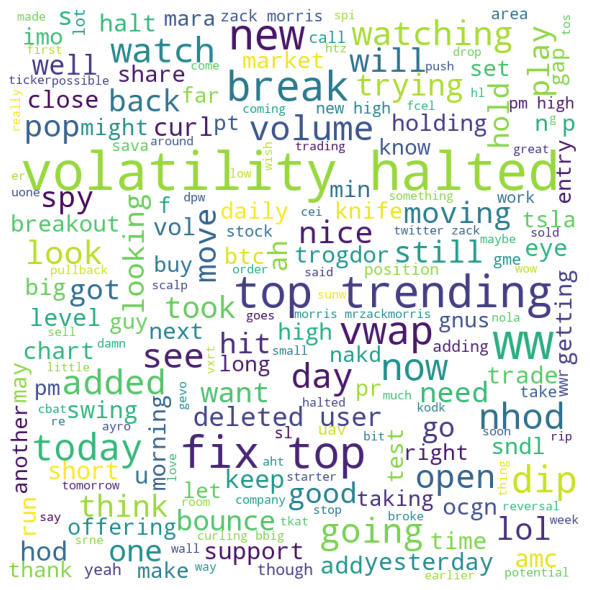

In [10]:
word_cloud(df[df["ticker_len"] != 0])

In [11]:
df.to_parquet("./700077347251945472.parquet")

In [8]:
df[df["ticker_len"] != 0].groupby(data.date.dt.year)

NameError: name 'data' is not defined

In [ ]:
times = pd.to_datetime(df.timestamp)

In [9]:
def ticker_map(grp):
    m = {}
    for tickers in grp["ticker"]:
        for t in tickers:
            m[t] = m.get(t, 0) + 1
    return m
    

In [10]:
df.groupby(times.dt.date).apply(ticker_map)

NameError: name 'times' is not defined

In [11]:
df["emoji_name_map"] = df.reactions.apply(lambda x: {obj["emoji"]["name"]:obj["count"] for obj in x})

In [12]:
df[df["ticker_len"] != 0]

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,author,attachments,embeds,stickers,reactions,mentions,reference,ticker,ticker_len,emoji_name_map
5,700077569315438604,Default,2020-04-15T20:18:19.337+00:00,None,None,False,DYNT going,"{'id': '395684503491837953', 'name': 'BondJame...",[],[],[],[],[],NaN,[DYNT],1,{}
7,700077754254753832,Default,2020-04-15T20:19:03.43+00:00,2020-04-15T20:19:15.598+00:00,None,False,BBBY Scalp went in small,"{'id': '341266245305368589', 'name': 'nola', '...","[{'id': '700077754061684847', 'url': 'https://...",[],[],[],[],NaN,[BBBY],1,{}
9,700077957150146620,Default,2020-04-15T20:19:51.804+00:00,None,None,False,We good @PJ Matlock,"{'id': '344275864638455808', 'name': 'Emperort...",[],[],[],"[{'emoji': {'id': '', 'name': '💯', 'isAnimated...","[{'id': '332561722621820951', 'name': 'PJ Matl...",NaN,[PJ],1,{'💯': 2}
10,700078273178107934,Default,2020-04-15T20:21:07.151+00:00,None,None,False,Two mask companies I have a bit of are NBY and...,"{'id': '697701560066637826', 'name': 'Willy Me...",[],[],[],[],[],NaN,"[NBY, OMI]",2,{}
13,700078630469894164,Default,2020-04-15T20:22:32.336+00:00,None,None,False,Cat fight @ALGO,"{'id': '456226577798135808', 'name': 'Deleted ...",[],[],[],"[{'emoji': {'id': '474674916575281163', 'name'...","[{'id': '403030746526253057', 'name': 'ALGO', ...",NaN,[ALGO],1,"{'catcry': 3, '😂': 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492457,1030593781810069514,Default,2022-10-14T21:31:45.09+00:00,None,None,False,INPX fuckery all AH here,"{'id': '994737975588032654', 'name': 'Fresh Pr...",[],[],[],[],[],NaN,"[INPX, AH]",2,{}
492458,1030594191148986429,Default,2022-10-14T21:33:22.684+00:00,None,None,False,INPX 7's up,"{'id': '994737975588032654', 'name': 'Fresh Pr...",[],[],[],"[{'emoji': {'id': '', 'name': '🔥', 'isAnimated...",[],NaN,[INPX],1,"{'🔥': 6, '👍': 4, 'this': 2}"
492460,1030614052797419591,Default,2022-10-14T22:52:18.07+00:00,None,None,False,```fix\nTop Trending: LCID TOP ILAG TSLA NIO X...,"{'id': '700494469967118430', 'name': 'Atlas Tr...",[],[],[],[],[],NaN,"[LCID, TOP, ILAG, TSLA, NIO, XPEV, RIVN, KR, P...",10,{}
492461,1030633910004101140,Default,2022-10-15T00:11:12.397+00:00,None,None,False,"INPX close above 6.50, watcher early AM on Mon...","{'id': '994737975588032654', 'name': 'Fresh Pr...",[],[],[],"[{'emoji': {'id': '', 'name': '👀', 'isAnimated...",[],NaN,"[INPX, AM]",2,{'👀': 6}


## Sanity check ticker

In [44]:
# ticker sanity check
tickers = []
for ts in df.ticker:
    for t in ts:
        tickers.append(t)
tickers = set(tickers)

In [ ]:
from alpha import check_ticker
blacklist = []
for t in tqdm(tickers):
    if not check_ticker(t):
        blacklist.append(t)

In [59]:
len(blacklist)

172